# **Solution to Inaugural Project 2024**
By Anna Abildskov, Emma Knippel and Oscar Nyholm

# Table of contents
* [Setup](#toc0_)   

* [Question 1: Edgeworth Box](#toc1_) 

* [Question 2: Market Clearing Error](#toc2_)    

* [Question 3: Market Clearing Price](#toc3_)    

* [Question 4: A as Price Setter](#toc4_)   

* [Question 5: A as Market Maker](#toc5_) 

* [Question 6: Utalitarian Social Planner](#toc6_) 

* [Question 7: Random Draw](#toc7_) 

* [Question 8: Market Equilibrium](#toc8_) 



## <a id='toc0_'></a>[Setup](#toc0_)

Imports and set magics:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
from inauguralproject import ExchangeEconomyClass

## <a id='toc1_'></a>[Question 1: Edgeworth Box](#toc1_)

**1.1 Illustrating the endowment in the edgeworth box**

First, we utilize the code provided to illustrate the endowments for both A and B in the edgeworth box. 

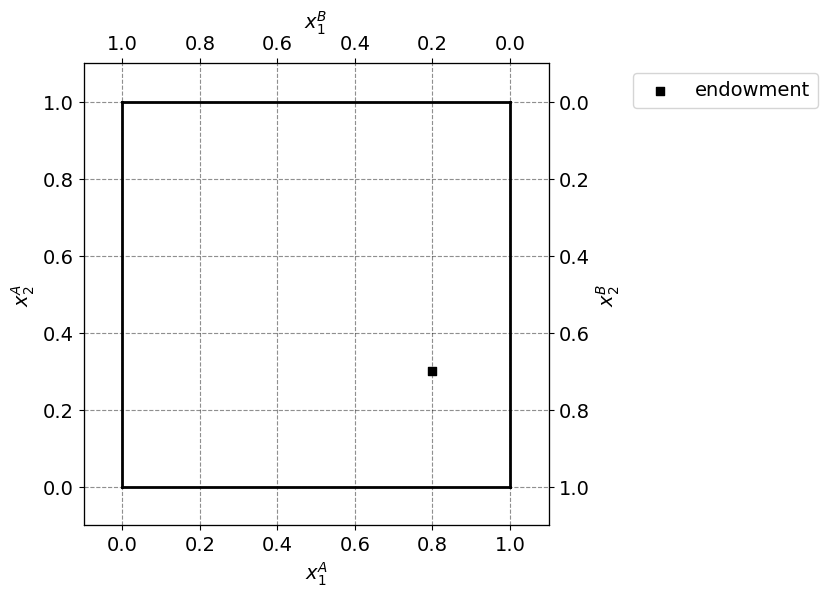

In [2]:
model = ExchangeEconomyClass()
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

**1.2 Illustrating the consumption sets for pareto improvement**

In the edgeworth box, we plot all the combinations of $x_1^A$ and $x_2^A$ (when $x_1^B$ $\equiv$ $(1-x_1^A)$ and $x_2^B$ is $\equiv$ $(1-x_2^A)$) that yield a pareto improvement in utility from the starting point of A and B consuming their respective endowments. We do this by creating a nested loop over all N values of $x_1^A$ and $x_2^A$ in {$0, \frac{1}{N}, \frac{2}{N},..,N$} and adding them pairwise to a list if they satisfy both of the following conditions conditions:

$$\begin{aligned} 
u^A(x_1^A,x_2^A)≥u^A(\omega_1^A,\omega_2^A)\\
u^B(x_1^B,x_2^B)≥u^B(\omega_1^B,\omega_3^B)
\end{aligned}$$

Then, we introduce the value-pairs to the edgeworth box, marked as "Pareto improvements".


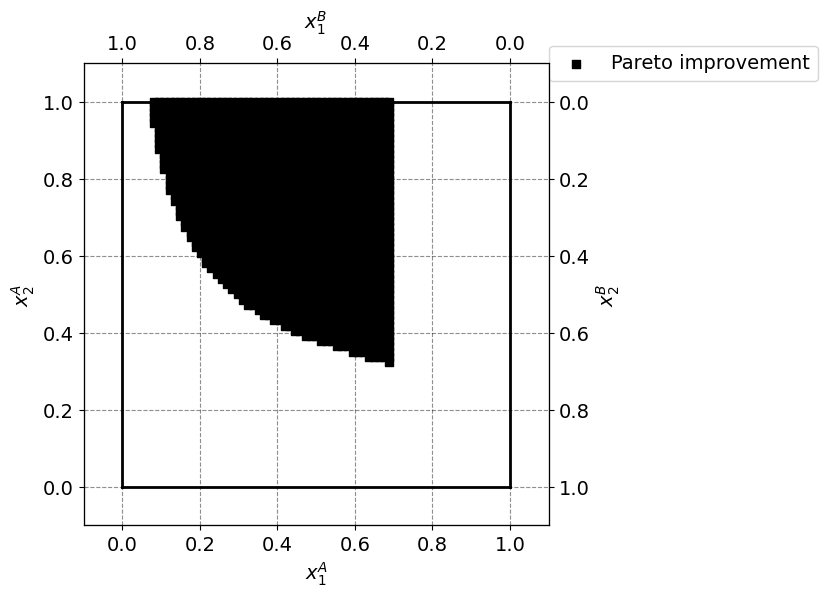

In [31]:
pareto_pairs = model.pareto_improvement()

x1A_values = [pair[0] for pair in pareto_pairs]
x2A_values = [pair[1] for pair in pareto_pairs]

fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

ax_A.scatter(x1A_values, x2A_values,marker='s',color='black',label='Pareto improvement')

ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='center right',bbox_to_anchor=(1.6,1.0));

## <a id='toc2_'></a>[Question 2: Market Clearing Error](#toc2_)

**2.1 Printing market clearing errors**

To calculate the market clearing errors for $p_1$ $\in$ $\mathcal{P}_1$ = {$0.5, 0.5+2\frac{1}{N},0.5+2\frac{2}{N},...,2.5$}, we loop over the values and save the errors to a list. The first five value pairs in the list are presented below.

In [32]:
eps_values = model.market_clearing_error()
print(f'The first five value pairs are:\n\
 ({eps_values[0][0]:.3f}, {eps_values[0][1]:.3f})\n\
 ({eps_values[1][0]:.3f}, {eps_values[1][1]:.3f})\n\
 ({eps_values[2][0]:.3f}, {eps_values[2][1]:.3f})\n\
 ({eps_values[4][0]:.3f}, {eps_values[4][1]:.3f})')

The first five value pairs are:
 (0.533, -0.267)
 (0.475, -0.250)
 (0.423, -0.234)
 (0.332, -0.202)
(0.533, -0.267)
(0.475, -0.250)
(0.423, -0.234)
(0.332, -0.202)
 (0.332, -0.202)


## <a id='toc3_'></a>[Question 3: Market Clearing Price](#toc3_)

**3.1 Finding the Market Clearing Price**

In order to find the market clearing price, we need to obtain a value of $p_1$ where $\epsilon_1$ is equal to 0. Since Walras' law applies, this - by definition - means that $\epsilon_2$ is also 0, and the market clears.

We assumed that the exercise called for a value of $p_1$ within $\mathcal{P}_1$. Therefore, we realized that our value would not necessarily be exactly equal to 0, but rather an approximation. Thus, we set our tolerance at 0.009, getting the value within $\mathcal{P}_1$ that yields the market clearing error CLOSEST to zero.

Now, we just find the single value of $p_1$ in $\mathcal{P}_1$ where our condition holds, giving us the market clearing price.

In [33]:
market_clearing_price = model.market_clearing_price()[0]

print(f'The market clearing price is {market_clearing_price:.3f}')

The market clearing price is 0.932


## <a id='toc4_'></a>[Question 4: A as Price Setter](#toc4_)

For the following two question, we assume that consumer A can choose a price to maximize her own utility.

**4.a When choosing a price $p_1$ wihtin $\mathcal{P}_1$**

Consumer A is looking to maximize her own utility at a price $p_1$, given the distribution of endowment between her and consumer B. She is thus looking to maximize:
$$\max_{p_1 \in \mathcal{P}_1} u^A(1-x^B_1(\mathbf{p},\mathbf{\omega^B}), 1-x^B_2(\mathbf{p},\mathbf{\omega^B}))$$

Since we are looking to find the optimal price in a discrete amount, we utilize a grid-search.

In [36]:
N=75
p1_vec = np.linspace(0.5,2.5,N)

# to solve this question, we do loop through the possible values of P_1 

utility_best = -np.inf # initial maximum
p1_best = np.nan # not-a-number

for p1 in p1_vec:
    utility_now = -model.price_setter(p1)
    if utility_now > utility_best:
        p1_best = p1
        utility_best = utility_now

x1B,x2B = model.demand_B(p1)
utilityB = model.utility_B(x1B,x2B)

print(f'Consumer A would choose prise p_1 = {p1_best:.3f}, and get utility {utility_best:.3f}')
print(f'Consumer B would recieve utility = {utilityB:.3f}')
print(f'The respective consumers would consume (x1A,x2A) = ({1-x1B:.3f},{1-x2B:.3f}) and (x1B,x2B) = ({x1B:.3f},{x2B:.3f})')


Consumer A would choose prise p_1 = 1.905, and get utility 0.634
Consumer B would recieve utility = 0.345
The respective consumers would consume (x1A,x2A) = (0.680,0.600) and (x1B,x2B) = (0.320,0.400)


**4.b When choosing any price $p_1$>0**

Consumer A can now freely choose any positive value of $p_1$ to maximize her own utility given the distribution of endowments between her and consumer B. She is thus looking to maximize:

$$\max_{p_1>0} u^A(1-x^B_1(\mathbf{p},\mathbf{\omega^B}), 1-x^B_2(\mathbf{p},\mathbf{\omega^B}))$$

Since we are now looking for any positive value of $p_1$, we are looking at a continous maximization problem and will therefor be calling a solver using SciPy optimize. 


In [37]:
bounds = [(0,None)] # the price can be any positive number
initial_guess = [1]

sol = optimize.minimize(model.price_setter,initial_guess,bounds=bounds)

# unpacking the solution
x1B,x2B = model.demand_B(sol.x)
utilityB = model.utility_B(x1B,x2B)
utilityA = model.utility_A(1-x1B,1-x2B)

np.set_printoptions(precision=3)
print(f'Consumer A would choose price p_1 = {sol.x} and get utility {utilityA}')
print(f'Consumer B would recieve utility = {utilityB}')
print(f'The respective consumers would consume (x1A,x2A) = ({1-x1B},{1-x2B}) and (x1B,x2B) = ({x1B},{x2B})')



Consumer A would choose price p_1 = [1.899] and get utility [0.634]
Consumer B would recieve utility = [0.373]
The respective consumers would consume (x1A,x2A) = ([0.621],[0.64]) and (x1B,x2B) = ([0.379],[0.36])


## <a id='toc5_'></a>[Question 5: A as Market Maker](#toc5_)

For the following two questions, we now assume that consumer A chooses consumer B's consumption, but such that consumer B is not worse of than with their initial endowments. 

**5.a Choosing consumption restricted to $\mathcal{C}$**

Consumer A's choice is first restricted to $\mathcal{C}$ and is thus looking to maximize:
$$\max_{(x_1^A,x_2^A) \in \mathcal{C}} u^A(x_1^A,x_2^A)$$

Like in question 4.a, as this is a discrete set of possible allocations, we loop through the possibilites. 


In [44]:
max_utility = -np.inf # initial guess

pareto_pairs = model.pareto_improvement()
x1A = np.nan
x2A = np.nan

initial_utilityB = model.utility_B(0.2,0.7)

for x1A,x2A in pareto_pairs:
    utility_nowA = model.utility_A(x1A,x2A)
    utility_nowB = model.utility_B(1-x1A,1-x2A)
    if max_utility > utility_now and initial_utilityB >= utility_nowB:
        max_utility = utility_now
        x1A = [pair[0] for pair in pareto_pairs]
        x2A = [pair[1] for pair in pareto_pairs]

utlityA = model.utility_A(x1A,x2A)
utilityB = model.utility_B(1-x1A,1-x2A)

np.set_printoptions(precision=3)
print(f'Consumer Bs initial endowment was (x1B,x2B) = (0.2,0.7) and her utility was {initial_utilityB:.3f}')
print(f'Consumer A would choose consumption (x1A,x2A) = ({x1A:.3f},{x2A:.3f}) and would get utility {utilityA}')
print(f'Consumer B would have consumption (x1B,x2B) = ({1-x1A:.3f},{1-x2A:.3f}) and would get utility {utilityB}')


Consumer Bs initial endowment was (x1B,x2B) = (0.2,0.7) and her utility was 0.304
Consumer A would choose consumption (x1A,x2A) = (0.689,1.000) and would get utility [0.634]
Consumer B would have consumption (x1B,x2B) = (0.311,0.000) and would get utility 0.0


**5.b Choosing consumption with no further restrictions**

Consumer A can now choose any allocation and is thus looking to maximize:
$$\max_{(x_1^A,x_2^A)\in[0,1]*[0,1]} u^A(x_1^A,x_2^A)\\
s.t.  u^B(1-x_1^A,1-x_2^A)≥u^B(\omega_1^B,\omega_2^B)$$

Like in 4.b, consumer A can now choose freely and we therefor use the SciPy optimizer for this.

In [49]:
bounds = x1A,x2A == np.linspace[0,1]
constraints = model.utility_B(1-x1A,1-x2A) >= initial_utilityB
initial_guess = [1]

sol = optimize.minimize(model.market_maker,initial_guess,bounds=bounds, constraints=constraints)

# unpacking the solution
x1A,x2A = model.demand_A(sol.x)
utilityA = model.utility_A(x1A,x2A)
utilityB = model.utility_B(1-x1A,1-x2A)

np.set_printoptions(precision=3)
print(f'Consumer Bs initial endowment was (x1B,x2B) = (0.2,0.7) and her utility was {initial_utilityB:.3f}')
print(f'Consumer A would choose consumption (x1A,x2A) = ({x1A:.3f},{x2A:.3f}) and would get utility {utilityA}')
print(f'Consumer B would have consumption (x1B,x2B) = ({1-x1A:.3f},{1-x2A:.3f}) and would get utility {utilityB}')


TypeError: 'numpy._ArrayFunctionDispatcher' object is not subscriptable

## <a id='toc6_'></a>[Question 6: Utilitarian Social Planner](#toc6_)

**6.1 Utilitarian Social Planners best allocation**

To find the best allocation we need to define the new function and set some constraints which ensure that both x_1A and x_2A do not exceed 1, but neither do they become less than 0.

In addition, we come up with a guess at x0, after which we use the optimize.minimize function to find the best allocation.

In [ ]:
optimal_allocation = model.utilitarian_planner()

print("Utilitarian social planer allocation:")
print(f"x_1A = {optimal_allocation[0]:.3f}")
print(f"x_2A = {optimal_allocation[1]:.3f}")


x_1B = 1 - x_1A = 0.667
<br>
x_2B = 1 - x_2A = 0.333


**6.2 Illustrate and compare with your results in question 3-5**

In [ ]:
x1A, x2A = optimal_allocation
x1B, x2B = 1 - x1A, 1 - x2A

plt.figure(figsize=(6, 6))
plt.plot([x1A], [x2A], 'bo', label='Consumer A')
plt.plot([x1B], [x2B], 'ro', label='Consumer B')
plt.xlabel('good 1')
plt.ylabel('good 2')
plt.title('Consumer A and B Bundles')
plt.legend()
plt.grid(True)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()


## <a id='toc7_'></a>[Question 7: Random Draw](#toc7_)

**7.1 Drawing the set $\mathcal{W}$ with 50 elements**

We draw 50 random values of $\omega_1^A$ and 50 random values of $\omega_2^A$.\
Then, we pair them together in a numpy array, our $\mathcal{W}$ and print out the first five elements of the set to illustrate.

In [ ]:
np.random.seed(2000)
w1A = np.random.uniform(low=0, high=1, size=50)
w2A = np.random.uniform(low=0, high=1, size=50)

W = np.column_stack((w1A,w2A))
print(f'The first five elements of the set are:\n\
({W[0][0]:.3f}, {W[0][1]:.3f})\n\
({W[1][0]:.3f}, {W[1][1]:.3f})\n\
({W[2][0]:.3f}, {W[2][1]:.3f})\n\
({W[4][0]:.3f}, {W[4][1]:.3f})')


## <a id='toc8_'></a>[Question 8: Market Equilibrium](#toc8_)

We find the market equilibrium allocations by optimizing the consumption set C. This can be done by setting up constraints, give an initial guess on both goods and optimizing the function.

Market equilibrium allocation for consumer A:
x1 = 0.696
x2 = 0.696


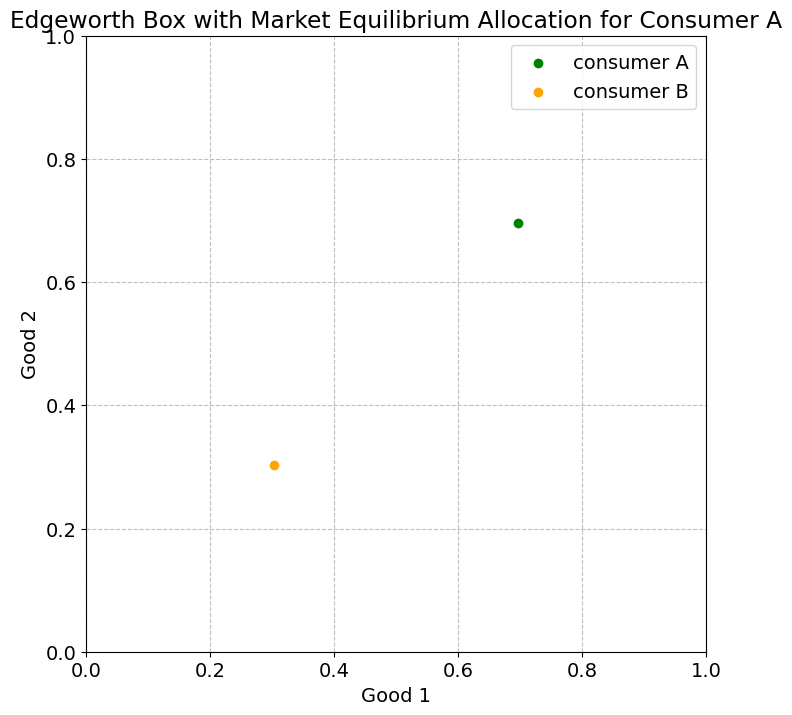

In [3]:
x1, x2 = model.market_equilibrium_allocation8()

print("Market equilibrium allocation for consumer A:")
print(f"x1 = {x1:.3f}")
print(f"x2 = {x2:.3f}")

x1A, x2A = x1, x2
x1B = 1 - x1A
x2B = 1 - x2A

plt.figure(figsize=(8, 8))
plt.scatter(x1A, x2A, color='green', label='consumer A')
plt.scatter(x1B, x2B, color='orange', label='consumer B')
plt.xlabel('Good 1')
plt.ylabel('Good 2')
plt.title('Edgeworth Box with Market Equilibrium Allocation for Consumer A')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()